In [1]:
# validation_curve : 단일 하이퍼 파라미터 최적화
# GridSearchCV : 그리드를 사용한 복수 하이퍼 파라미터 최적화
import pandas as pd
df = pd.read_csv("c:/data/soccer/player.csv")
df.head()

,id,player_name,birthday,preferred_foot,age,height,weight,potential,right_foot,left_foot,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,overall_rating,Label
0,1,Aaron Appindangoye,1992-02-29,right,27,183,187,71,1,0,...,65,69,69,6,11,10,8,8,67,0
1,2,Aaron Cresswell,1989-12-15,right,30,170,146,71,1,0,...,65,69,69,6,11,10,8,8,67,0
2,3,Aaron Doran,1991-05-13,right,28,170,163,66,1,0,...,65,66,69,6,11,10,8,8,62,0
3,4,Aaron Galindo,1982-05-08,right,37,183,198,65,1,0,...,62,63,66,5,10,9,7,7,61,0
4,5,Aaron Hughes,1979-11-08,right,40,183,154,65,1,0,...,62,63,66,5,10,9,7,7,61,0


In [2]:
train_cols = df.columns[4:43]
print(train_cols)
X = df[train_cols] # 독립변수
y = df["Label"] # 종속변수
y.value_counts()

Index(['age', 'height', 'weight', 'potential', 'right_foot', 'left_foot',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')


1    5705
0    5230
Name: Label, dtype: int64

In [3]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Label'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp.Label.value_counts()
X = df_samp[train_cols] # 독립변수
y = df_samp["Label"] # 종속변수

In [ ]:
# validation_curve 함수 : 1개의 파라미터를 튜닝하는 함수
# param_name 최적화할 파라미터 이름
# param_range 범위
# scoring 성능 측정 기준

In [4]:
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X, y,
param_name="n_neighbors", param_range=list(range(2,6)), cv=3, scoring="accuracy", n_jobs=4)

In [5]:
print(train_scores)
print(test_scores)

[[0.97303886 0.97547684 0.97777459]
 [0.97533343 0.97748458 0.98092917]
 [0.9624265  0.96529471 0.96802409]
 [0.96443425 0.96414743 0.96601663]]
[[0.87066246 0.868655   0.85570855]
 [0.87525093 0.86550043 0.85169248]
 [0.88442787 0.87467737 0.86574871]
 [0.88328076 0.86836822 0.86402754]]


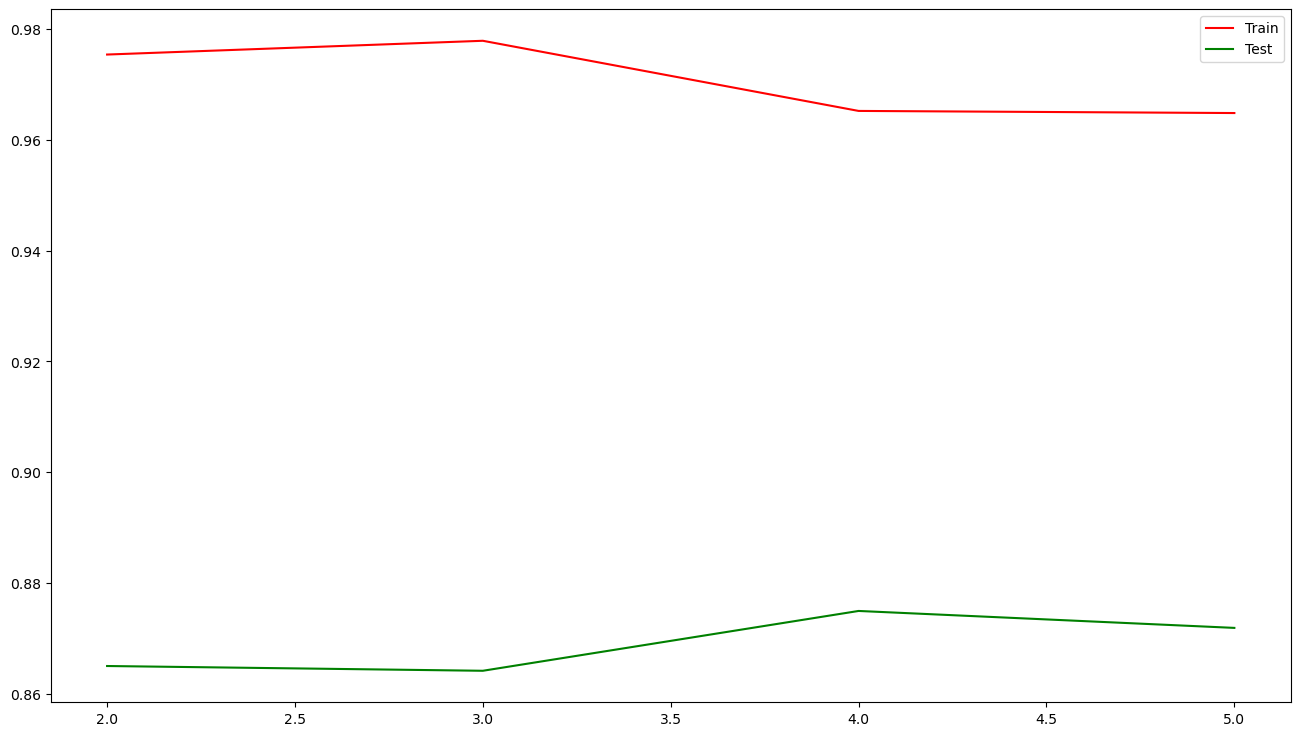

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.rcParams['figure.figsize']=(16,9)
plt.plot(list(range(2,6)), train_scores_mean, label="Train", color="r")
plt.plot(list(range(2,6)), test_scores_mean, label="Test", color="g")
plt.legend(loc="best")
plt.show()
#k=4일 때 최적
#단순한 모형인 경우에는 적합하지만 튜닝할 파라미터가 많은 모형에는 적합하지 않은 방법

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([('scl', StandardScaler()),
                 ('clf', KNeighborsClassifier())])
#                변수명    모형
param_grid = [
    {'clf__weights': ['uniform','distance'],
                    # 동일한 값   가까운 것
    'clf__p': [1,2],
    # 1: 맨해튼, 2: 유클리드
    'clf__n_neighbors': list(range(2,6))
    }
]
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=4)
gs.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=4,
             param_grid=[{'clf__n_neighbors': [2, 3, 4, 5], 'clf__p': [1, 2],
                          'clf__weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [8]:
gs.cv_results_["params"]

[{'clf__n_neighbors': 2, 'clf__p': 1, 'clf__weights': 'uniform'},
 {'clf__n_neighbors': 2, 'clf__p': 1, 'clf__weights': 'distance'},
 {'clf__n_neighbors': 2, 'clf__p': 2, 'clf__weights': 'uniform'},
 {'clf__n_neighbors': 2, 'clf__p': 2, 'clf__weights': 'distance'},
 {'clf__n_neighbors': 3, 'clf__p': 1, 'clf__weights': 'uniform'},
 {'clf__n_neighbors': 3, 'clf__p': 1, 'clf__weights': 'distance'},
 {'clf__n_neighbors': 3, 'clf__p': 2, 'clf__weights': 'uniform'},
 {'clf__n_neighbors': 3, 'clf__p': 2, 'clf__weights': 'distance'},
 {'clf__n_neighbors': 4, 'clf__p': 1, 'clf__weights': 'uniform'},
 {'clf__n_neighbors': 4, 'clf__p': 1, 'clf__weights': 'distance'},
 {'clf__n_neighbors': 4, 'clf__p': 2, 'clf__weights': 'uniform'},
 {'clf__n_neighbors': 4, 'clf__p': 2, 'clf__weights': 'distance'},
 {'clf__n_neighbors': 5, 'clf__p': 1, 'clf__weights': 'uniform'},
 {'clf__n_neighbors': 5, 'clf__p': 1, 'clf__weights': 'distance'},
 {'clf__n_neighbors': 5, 'clf__p': 2, 'clf__weights': 'uniform'},
 {'

In [9]:
gs.cv_results_["mean_test_score"]

array([0.85955909, 0.8288693 , 0.86615609, 0.84244523, 0.85353598,
       0.85162376, 0.86338307, 0.86347863, 0.86969312, 0.85162355,
       0.87447335, 0.8627138 , 0.86596455, 0.86405225, 0.87189193,
       0.87131831])

In [10]:
print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

0.8744733532844969
{'clf__n_neighbors': 4, 'clf__p': 2, 'clf__weights': 'uniform'}
Pipeline(steps=[('scl', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=4))])


In [11]:
from sklearn.model_selection import cross_val_score
p=Pipeline([('scl',
StandardScaler()), 
('clf', KNeighborsClassifier(n_neighbors=4, p=2, weights='uniform'))])
result=cross_val_score(p, X, y, cv=10)
#교차검증 결과
print(result)
#교차검증 평균값
print(np.mean(result))

c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

[0.83556405 0.92734226 0.86998088 0.90057361 0.90344168 0.85181644
 0.85372849 0.87858509 0.86806883 0.87380497]
0.8762906309751435


c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
